In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import log2, sqrt, cos, sin, radians

## a) Generadores de números al azar con distribución uniforme, provistos por el lenguaje elegido para resolver el tp

### Primer metodo

In [9]:
MAX_POINT = 40
N_POINTS = 10000

In [10]:
p1 = [20 - np.sqrt(50), 20]
p2 = [20, 20 - np.sqrt(50)]
p3 = [20 + np.sqrt(50), 20]
p4 = [20, 20 + np.sqrt(50)]

In [11]:
def get_coefficients(point1, point2):
    """Calculo los coeficientes de la recta"""
    a = (point2[1] - point1[1]) / (point2[0] - point1[0])
    b = point1[1] - a * point1[0]    
    return a, b

In [12]:
def plot_lines():
    def plot_line(point1, point2, n_points=100):
        a, b = get_coefficients(point1, point2)
        polynomial = lambda x: a * x + b
        x_axis = np.linspace(0, MAX_POINT, n_points)
        y_axis = polynomial(x_axis)
        plt.plot(x_axis, y_axis)
    
    plot_line(p1, p4)
    plot_line(p2, p3)
    plot_line(p1, p2)
    plot_line(p4, p3)

In [13]:
def get_square_points(n_points):
    def factor_de_rendimiento(points_in, n_points):
        print("Factor de rendimiento: {}/{} ({:.2f}%)".format(points_in, n_points, (points_in/n_points)*100))
    
    def corte1(x, y):
        a, b = get_coefficients(p1, p4)
        return y < a*x + b
    
    def corte2(x, y):
        a, b = get_coefficients(p2, p3)
        return y > a*x + b
    
    def corte3(x, y):
        a, b = get_coefficients(p1, p2)
        return y > a*x + b
    
    def corte4(x, y):
        a, b = get_coefficients(p4, p3)
        return y < a*x + b
    
    x = [x*MAX_POINT for x in np.random.rand(n_points)]
    y = [y*MAX_POINT for y in np.random.rand(n_points)]
    X = []
    Y = []
    for i in range(n_points):
        if corte1(x[i], y[i]) & corte2(x[i], y[i]) & corte3(x[i], y[i]) & corte4(x[i], y[i]):
            X.append(x[i])
            Y.append(y[i])
    factor_de_rendimiento(len(X), n_points)
    return X, Y

Factor de rendimiento: 600/10000 (6.00%)


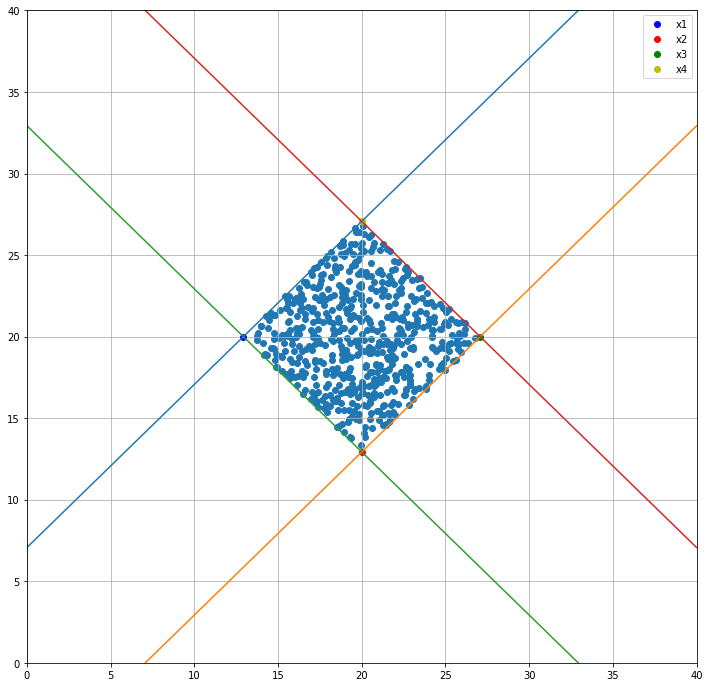

In [14]:
plt.figure(figsize=(12, 12))
plt.plot( p1[0], p1[1], 'go', label='x1', color='b')
plt.plot( p2[0], p2[1], 'go', label='x2', color='r')
plt.plot( p3[0], p3[1], 'go', label='x3', color='g')
plt.plot( p4[0], p4[1], 'go', label='x4', color='y')
plot_lines()
X, Y = get_square_points(N_POINTS)
plt.scatter(X, Y)
plt.ylim( (0, MAX_POINT) ) 
plt.xlim( (0, MAX_POINT) )
plt.grid('on')
plt.legend()
plt.show()

Podemos ver como el rendimiento de esta forma de hacerlo es bastante baja y aunque podriamos bajar la variable MAX_POINT para subir el rendimiento hay otra forma mas facil de lograrlo. En el siguiente metodo vamos a realizar un cuadrado de forma uniforme entre (0, 10) en ambos ejes, deplazarlos 15 en el eje Y para luego rotarlo en el sentido del reloj 45 grados. De esta forma todos los numeros que generemos van a caer dentro del area. En este caso nuestro rendimiento es 1 (100%)

### Segundo metodo

In [15]:
def rotate(origin, point, angle):
    ox, oy = origin
    px, py = point
    
    qx = ox + cos(angle) * (px - ox) - sin(angle) * (py - oy)
    qy = oy + sin(angle) * (px - ox) + cos(angle) * (py - oy)
    return qx, qy

In [16]:
xs = np.random.uniform(low=0, high=1, size=(N_POINTS)) * 10 + 15
ys = np.random.uniform(low=0, high=1, size=(N_POINTS)) * 10 + 15

In [17]:
l = []
for i in range(N_POINTS):
    l.append(rotate((20, 20), (xs[i], ys[i]), radians(45)))

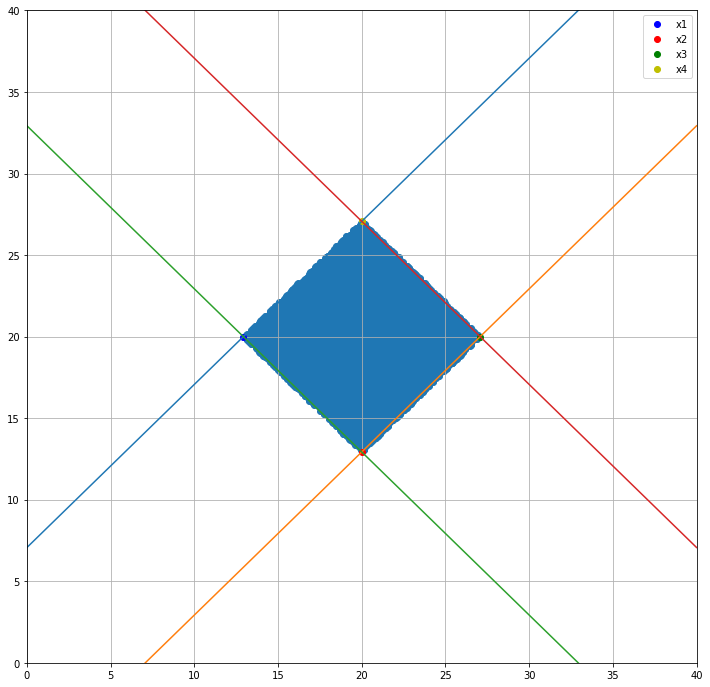

In [18]:
plt.figure(figsize=(12, 12))
plt.plot( p1[0], p1[1], 'go', label='x1', color='b')
plt.plot( p2[0], p2[1], 'go', label='x2', color='r')
plt.plot( p3[0], p3[1], 'go', label='x3', color='g')
plt.plot( p4[0], p4[1], 'go', label='x4', color='y')
plot_lines()
plt.scatter([x[0] for x in l], [x[1] for x in l])
plt.ylim( (0, MAX_POINT) ) 
plt.xlim( (0, MAX_POINT) )
plt.grid('on')
plt.legend()
plt.show()

## b) Generadores de números al azar implementados con el algoritmo del ejercicio 1.

Repito lo mismo del segundo metodo pero con el generador del punto 1 del tp

In [19]:
m = 2e32
a = 1013904223
c = 1664525
u0 = np.array([89992, 90251, 98271, 98577]).mean()

In [20]:
def GCL_elemento(Un):
    return (a*Un + c) % m

def GCL_vector(N, seed):
    v = np.empty(N)
    v[0] = seed
    for i in range(1,N):
        v[i] = GCL_elemento(v[i-1])
    return v

def GCL_vector_normalizado(N, seed):
    v = GCL_vector(N+1, seed)
    return v[1:] * 1/m

In [21]:
random =  GCL_vector_normalizado(N_POINTS*2, u0) * 10 + 15
xs = random[:N_POINTS]
ys = random[N_POINTS:]

In [22]:
l = []
for i in range(N_POINTS):
    l.append(rotate((20, 20), (xs[i], ys[i]), radians(45)))

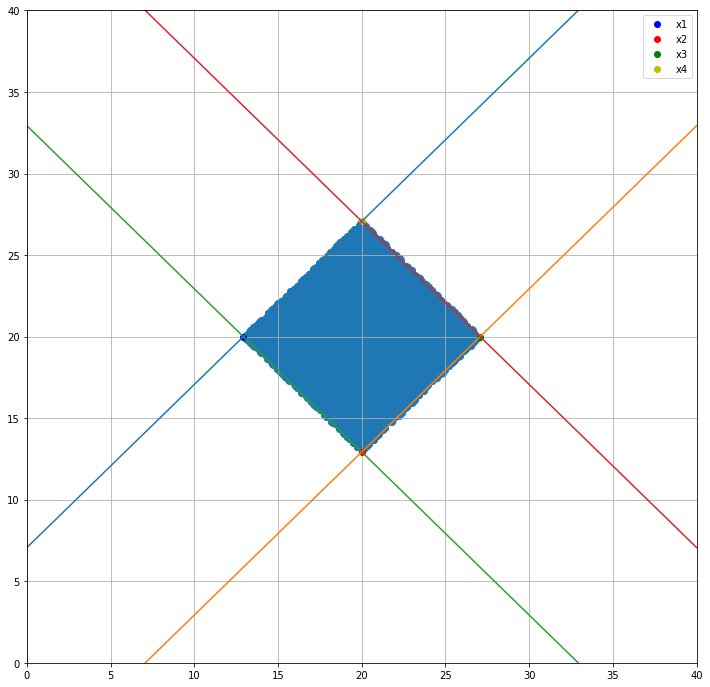

In [23]:
plt.figure(figsize=(12, 12))
plt.plot( p1[0], p1[1], 'go', label='x1', color='b')
plt.plot( p2[0], p2[1], 'go', label='x2', color='r')
plt.plot( p3[0], p3[1], 'go', label='x3', color='g')
plt.plot( p4[0], p4[1], 'go', label='x4', color='y')
plot_lines()
plt.scatter([x[0] for x in l], [x[1] for x in l])
plt.ylim( (0, MAX_POINT) ) 
plt.xlim( (0, MAX_POINT) )
plt.grid('on')
plt.legend()
plt.show()

# Test chi2 - distribucion uniforme python

In [33]:
xs = np.random.uniform(low=0, high=1, size=(N_POINTS)) * 10
ys = np.random.uniform(low=0, high=1, size=(N_POINTS)) * 10
x_min = 0
x_max = 10
step = 0.5

In [34]:
bins = []
for i in np.arange(x_min, x_max, step):
    bins.append((i, i + step))
    print("{} - {}".format(i, i + step))

0.0 - 0.5
0.5 - 1.0
1.0 - 1.5
1.5 - 2.0
2.0 - 2.5
2.5 - 3.0
3.0 - 3.5
3.5 - 4.0
4.0 - 4.5
4.5 - 5.0
5.0 - 5.5
5.5 - 6.0
6.0 - 6.5
6.5 - 7.0
7.0 - 7.5
7.5 - 8.0
8.0 - 8.5
8.5 - 9.0
9.0 - 9.5
9.5 - 10.0


In [35]:
dim = len(bins)
buckets = np.zeros((dim, dim))
for x, y in zip(xs, ys):
    for idx, (left, right) in enumerate(bins):
        if (x >= left) & (x <= right):
            indice_x = idx
        if (y >= left) & (y <= right):
            indice_y = idx
    buckets[indice_x][indice_y] += 1

In [36]:
buckets

array([[32., 17., 16., 27., 22., 20., 25., 26., 23., 22., 29., 25., 21.,
        24., 32., 17., 32., 33., 28., 26.],
       [26., 20., 36., 21., 28., 28., 24., 28., 25., 23., 21., 23., 20.,
        20., 29., 28., 25., 21., 32., 26.],
       [30., 26., 21., 27., 22., 35., 26., 36., 25., 20., 24., 19., 30.,
        23., 27., 24., 25., 24., 25., 19.],
       [22., 31., 23., 23., 19., 29., 34., 25., 17., 27., 20., 20., 21.,
        19., 16., 25., 25., 18., 18., 23.],
       [31., 22., 25., 24., 19., 26., 17., 20., 25., 39., 23., 20., 25.,
        21., 36., 18., 26., 25., 20., 23.],
       [24., 25., 28., 33., 22., 19., 25., 21., 27., 16., 28., 19., 28.,
        20., 35., 22., 24., 24., 26., 32.],
       [34., 25., 25., 26., 36., 19., 24., 33., 28., 25., 24., 30., 26.,
        24., 23., 38., 19., 19., 34., 29.],
       [29., 23., 24., 22., 30., 22., 22., 25., 29., 17., 29., 13., 23.,
        26., 30., 33., 30., 22., 19., 20.],
       [20., 22., 31., 26., 30., 26., 22., 31., 23., 28., 26., 2

In [37]:
from scipy.stats import chi2

In [38]:
c_buckets = dim*dim
c_buckets

400

In [39]:
D2 = []
for i in range(dim):
    for j in range(dim):
        D2.append((buckets[i][j] - ((1/c_buckets)*N_POINTS))**2)
D2 = sum(D2)/((1/c_buckets)*N_POINTS)
print("Estadistico: {:.2f}".format(D2))

Estadistico: 395.76


In [40]:
limiteSuperior = chi2.ppf(0.95, df=399)

if D2 <= limiteSuperior:
    print("El test acepta la hipotesis nula.")
else:
    print("El test rechaza la hipotesis nula")

El test acepta la hipotesis nula.


# Test chi2 - nuestra distribucion uniforme

In [55]:
random =  GCL_vector_normalizado(N_POINTS*2, u0) * 10
xs = random[:N_POINTS]
ys = random[N_POINTS:]
x_min = 0
x_max = 10
step = 0.5

In [56]:
dim = len(bins)
buckets = np.zeros((dim, dim))
for x, y in zip(xs, ys):
    for idx, (left, right) in enumerate(bins):
        if (x >= left) & (x <= right):
            indice_x = idx
        if (y >= left) & (y <= right):
            indice_y = idx
    buckets[indice_x][indice_y] += 1

In [57]:
D2 = []
for i in range(dim):
    for j in range(dim):
        D2.append((buckets[i][j] - ((1/c_buckets)*N_POINTS))**2)
D2 = sum(D2)/((1/c_buckets)*N_POINTS)
print("Estadistico: {:.2f}".format(D2))

Estadistico: 457.44


In [61]:
limiteSuperior = chi2.ppf(0.95, df=399)

if D2 <= limiteSuperior:
    print("El test acepta la hipotesis nula.")
else:
    print("El test rechaza la hipotesis nula")

El test rechaza la hipotesis nula


446.5742415929768

In [62]:
limiteSuperior = chi2.ppf(0.99, df=399)

if D2 <= limiteSuperior:
    print("El test acepta la hipotesis nula.")
else:
    print("El test rechaza la hipotesis nula")

El test acepta la hipotesis nula.


467.6421766979789

Podemos concluir que nuestro metodo tiene menor confianza